In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("D://Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#printing shape of data frame
data.shape

(200, 5)

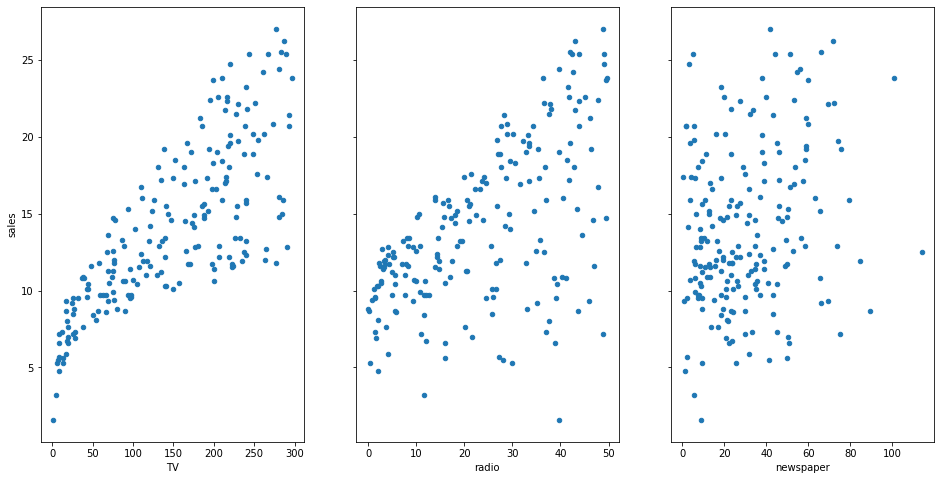

In [5]:
#visualizing using scatter plot
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

In [6]:
#1. Is there a relationship between ads and sales?
#2. How strong is that relationship?
#3. Which ad types contribute to sales?
#4. What is the effect of each ad type of sales?
#5. Given ad spending in a particular market, can sales be predicted?

In [7]:
feature_cols = ['TV']
X = data[feature_cols]
y = data.sales

In [8]:
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as lm
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#printing intercept and coeff
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


In [10]:
X_new=pd.DataFrame({'TV':[50]})
X_new.head

,TV
0,50


In [11]:
lm.predict(X_new)

array([9.40942557])

In [12]:
#plotting least square line
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [13]:
#predicted values
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

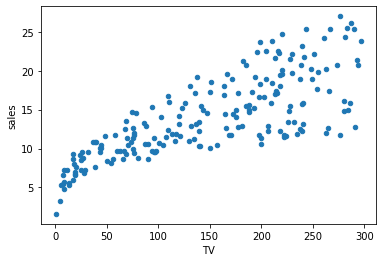

In [14]:
#plotting observed data
data.plot(kind='scatter', x='TV', y='sales')

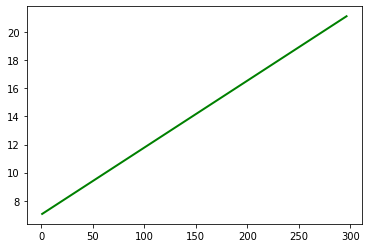

In [15]:
#plotting least square line
plt.plot(X_new, preds, c='green', linewidth=2)

In [16]:
#printing accuracy
accuracy=lm.score(X, y)
print('accuracy=',accuracy)


accuracy= 0.611875050850071


In [17]:
#using stats model formula
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV', data=data).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [18]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           1.47e-42
Time:                        02:05:21   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#hypothesis testing and p-values
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [20]:
#if the 95% confidence interval includes 0, the p-value is greater than 0.05
#if the 95% confidence interval does not includes 0, the p-value is less than 0.05 
            #and this indicates the relation between feature(x) and response(y).

In [21]:
#printing r-squared value
lm.rsquared

0.611875050850071

---

In [22]:
feature_cols = ['TV', 'radio', 'newspaper']
X1 = data[feature_cols]
y1 = data.sales

In [23]:
lm = LinearRegression()
lm.fit(X1, y1)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)
lm.score(X1, y1)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


0.8972106381789521

In [24]:
#testing hypothesis
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.conf_int()

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
radio,0.171547,0.205513
newspaper,-0.012616,0.010541


In [25]:
#only include TV and Radio in the model
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm.rsquared

0.8971942610828957

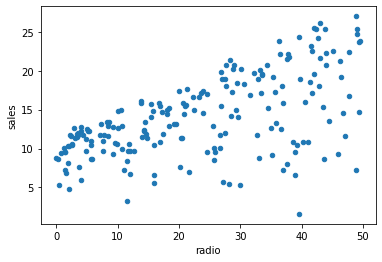

In [31]:
data.plot(kind='scatter', x='radio', y='sales')

In [27]:
#adding newspaper to the model
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

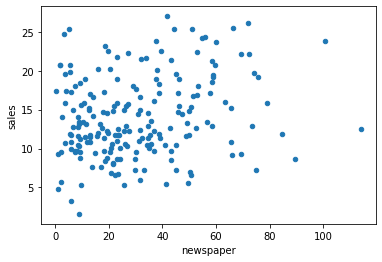

In [32]:
data.plot(kind='scatter', x='newspaper', y='sales')

In [26]:
import numpy as np
np.random.seed(12345)

In [27]:
nums = np.random.rand(len(data))
mask_large = nums > 0.5

In [28]:
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'

In [29]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Size
0,1,230.1,37.8,69.2,22.1,large
1,2,44.5,39.3,45.1,10.4,small
2,3,17.2,45.9,69.3,9.3,small
3,4,151.5,41.3,58.5,18.5,small
4,5,180.8,10.8,58.4,12.9,large


In [30]:
# create a new Series called IsLarge
data['IsLarge'] = data.Size.map({'small':0, 'large':1})

In [31]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Size,IsLarge
0,1,230.1,37.8,69.2,22.1,large,1
1,2,44.5,39.3,45.1,10.4,small,0
2,3,17.2,45.9,69.3,9.3,small,0
3,4,151.5,41.3,58.5,18.5,small,0
4,5,180.8,10.8,58.4,12.9,large,1


In [32]:
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge']
X = data[feature_cols]
y = data.sales

In [33]:
#model fitting
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
zip(feature_cols, lm.coef_)

In [35]:
accuracy=lm.score(X, y)
print('accuracy=',accuracy)

accuracy= 0.8972400790092474


In [36]:
np.random.seed(123456)
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'

In [37]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Size,IsLarge,Area
0,1,230.1,37.8,69.2,22.1,large,1,rural
1,2,44.5,39.3,45.1,10.4,small,0,urban
2,3,17.2,45.9,69.3,9.3,small,0,rural
3,4,151.5,41.3,58.5,18.5,small,0,urban
4,5,180.8,10.8,58.4,12.9,large,1,suburban


In [38]:
#creating dummy variables
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]

In [39]:
area_dummies

,Area_suburban,Area_urban
0,0,0
1,0,1
2,0,0
3,0,1
4,1,0
...,...,...
195,1,0
196,0,1
197,1,0
198,0,0


In [40]:
#concatinating dummy varibles with origial dataframe
data = pd.concat([data, area_dummies], axis=1)
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Size,IsLarge,Area,Area_suburban,Area_urban
0,1,230.1,37.8,69.2,22.1,large,1,rural,0,0
1,2,44.5,39.3,45.1,10.4,small,0,urban,0,1
2,3,17.2,45.9,69.3,9.3,small,0,rural,0,0
3,4,151.5,41.3,58.5,18.5,small,0,urban,0,1
4,5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [41]:
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.sales
    
# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)
    
# print coefficients
print(feature_cols, lm.coef_)


['TV', 'radio', 'newspaper', 'IsLarge', 'Area_suburban', 'Area_urban'] [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]


In [42]:
accuracy=lm.score(X, y)
print('accuracy=',accuracy)

accuracy= 0.8981611875394305


In [33]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

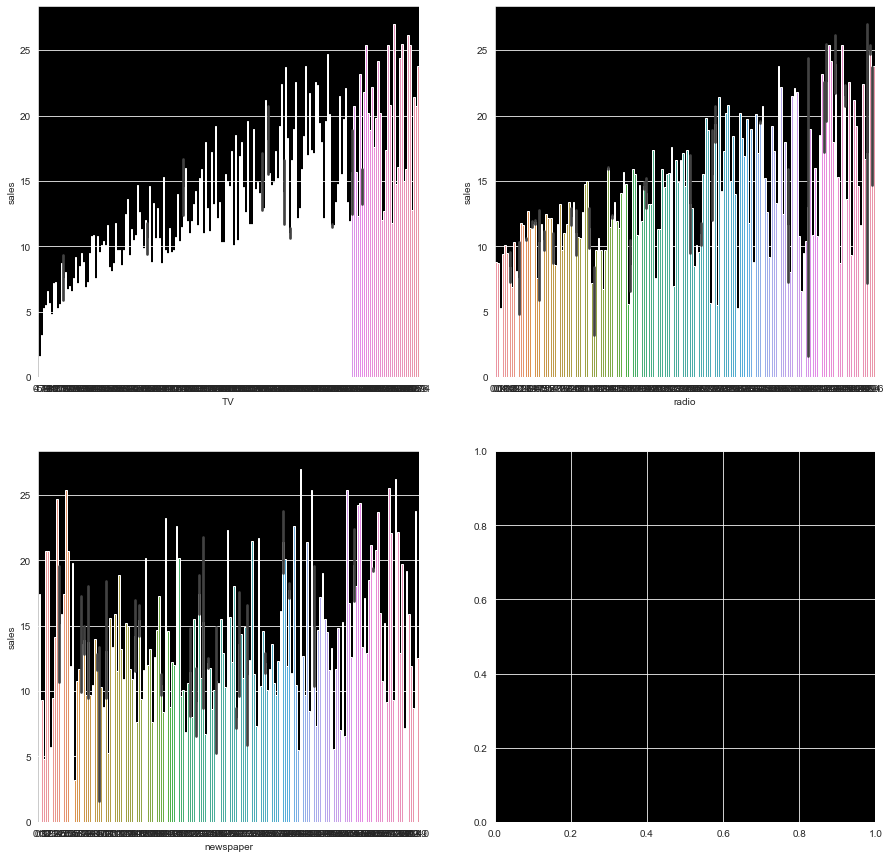

In [42]:
#f, axes=plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
f, axes = plt.subplots(2, 2, figsize=(15,15))
k1=sns.barplot(data.TV, data.sales, ax=axes[0,0])
k2=sns.barplot(data.radio, data.sales, ax=axes[0,1])
k3=sns.barplot(data.newspaper, data.sales, ax=axes[1,0])
